#Install Libraries

In [ ]:
pip install pyvis
pip install numpy
pip install matplotlib
pip install networkx
pip install pandas
pip install csv

#Importing Libraries




In [ ]:
#importing libraries
import networkx as nx
import pandas as pd
from os.path import expanduser
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

#Importing data into pandas

In [ ]:
bio_df=pd.read_csv("/content/bio-pathways-network.csv")
bio_df.head

<bound method NDFrame.head of         Gene ID 1  Gene ID 2
0            1394       2778
1            6331      17999
2          122704      54460
3            2597       2911
4            4790      79155
...           ...        ...
342348      10969       4670
342349       6774      55748
342350      23299     399693
342351       9247     337967
342352      23193       7077

[342353 rows x 2 columns]>

#Generating Networkx Graph

In [ ]:
G=nx.Graph()
for index in range(len(bio_df.index)):
  G.add_edge(bio_df.iloc[index, 0], bio_df.iloc[index, 1])
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), with_labels = False)

In [ ]:
print(G.degree[7124])

142


In [ ]:
print(bio_df.iloc[0, 0])

1394


In [ ]:
len(bio_df.index)

342353

#Computing Degree Centrality

In [ ]:
#Importing csv file as panda dataframe

def csv_to_adj(path):
  bio_df=pd.read_csv(path) 
  #temp_G = bio_df.copy()
  #Converting the dataframe into and adjency matrix format for the ease of computation
  bio_df = pd.crosstab(bio_df['Gene ID 1'], bio_df['Gene ID 2'])  
  idx = bio_df.columns.union(bio_df.index)
  bio_df = bio_df.reindex(index = idx, columns = idx, fill_value=0)
  return bio_df#, temp_G


In [ ]:
PP_G_adj= csv_to_adj("/content/bio-pathways-network.csv")

In [ ]:
#Finding degree centrality based on the protein ID provided
def degree_centrality(G, protein_ID):
  temp_G_x = []
  temp_G_y = []
  degree = 0
  for label in G.columns:
    temp_G_x.append(G.loc[protein_ID, label]) # Fetching the degree details of the protein node provided and t=storing into an array
  
  for label_y in G.index:
    temp_G_y.append(G.loc[label_y, protein_ID])

  for col in range(0, G.shape[0]): # calculating the degree of the protein_ID node provided
    degree = degree + temp_G_x[col] + temp_G_y[col]

  degree_centrality = (degree/(G.shape[0]-1)) 
  return degree_centrality

In [ ]:
print(degree_centrality(PP_G_adj, protein_ID=7124))

0.00658749304138059


#Computing Number of Reoccurence(Or Criticality) of protein nodes

In [ ]:
import pandas as pd
import numpy as np

df_all_associated_gene=pd.read_csv("/content/bio-pathways-associations.csv")

narr_all_associated_gene = []
for i in range(len(df_all_associated_gene.index)):
  narr_all_associated_gene += (df_all_associated_gene.iloc[i,2].split(', '))

print(f'Number of all associated protein for all disease(might recure): {len(narr_all_associated_gene)}')

narr_all_associated_gene_unique = []

for element in narr_all_associated_gene:
  if element not in narr_all_associated_gene_unique:
    narr_all_associated_gene_unique.append(element)
print(f'Number of all associated protein for all diseas unique: {len(narr_all_associated_gene_unique)}')

count_of_associated_gene_unique = []
for count_index in range(len(narr_all_associated_gene_unique)):
  count_of_associated_gene_unique.append(narr_all_associated_gene.count(narr_all_associated_gene_unique[count_index]))

print(f'Length of count array : {len(count_of_associated_gene_unique)}')

print(f'Maximum times a protein(dont know which protein yet) is reccuring: {max(count_of_associated_gene_unique)}')

print(f'Gene ID of most recuuring protein node among all the disease: {narr_all_associated_gene_unique[count_of_associated_gene_unique.index(max(count_of_associated_gene_unique))]}')




Number of all associated protein for all disease(might recure): 21357
Number of all associated protein for all diseas unique: 7294
Length of count array : 7294
Maximum times a protein(dont know which protein yet) is reccuring: 115
Gene ID of most recuuring protein node among all the disease: 7124


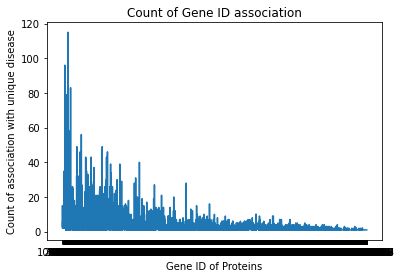

In [ ]:
plt.plot(narr_all_associated_gene_unique, count_of_associated_gene_unique)
plt.xlabel('Gene ID of Proteins')
plt.ylabel('Count of association with unique disease')
plt.title('Count of Gene ID association')
plt.show()

#Criticality v/s Degree Centrality

In [ ]:
copy_count_of_associated_gene_unique = count_of_associated_gene_unique.copy()
copy_count_of_associated_gene_unique.sort(reverse=True)
print(copy_count_of_associated_gene_unique)

print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')

top5_most_recurring_associate_protein = []
for i in range(5):
  top5_most_recurring_associate_protein.append(narr_all_associated_gene_unique[count_of_associated_gene_unique.index(copy_count_of_associated_gene_unique[i])])
  print(f'Gene ID of most recurring protein node in decreasing order {i+1}: {top5_most_recurring_associate_protein[i]}')


[115, 96, 83, 79, 68, 61, 58, 56, 50, 49, 49, 47, 46, 46, 46, 44, 43, 43, 43, 43, 42, 41, 40, 40, 39, 39, 39, 37, 37, 35, 35, 35, 35, 34, 34, 33, 33, 32, 32, 32, 31, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11

In [ ]:
for i in range(len(top5_most_recurring_associate_protein)):
 print(f'Gene ID of most recurring protein node in decreasing order {i+1} : {degree_centrality(PP_G_adj, protein_ID=int(top5_most_recurring_associate_protein[i]))}')

Gene ID of most recurring protein node in decreasing order 1 : 0.00658749304138059
Gene ID of most recurring protein node in decreasing order 2 : 0.005288550751530896
Gene ID of most recurring protein node in decreasing order 3 : 0.002180367415104843
Gene ID of most recurring protein node in decreasing order 4 : 0.000649471144924847
Gene ID of most recurring protein node in decreasing order 5 : 0.046437186862126556


In [ ]:
ID_present_in_network = []
copy_narr_all_associated_gene_unique = narr_all_associated_gene_unique.copy()
cpy_count_of_associated_gene_unique = count_of_associated_gene_unique.copy()

print(len(copy_narr_all_associated_gene_unique))
print(len(cpy_count_of_associated_gene_unique))

print('1' in narr_all_associated_gene_unique) 

for i in PP_G_adj.index:
  if i not in ID_present_in_network:
    ID_present_in_network.append(i)

for j in PP_G_adj.columns:
  if j not in ID_present_in_network:
    ID_present_in_network.append(i)

print(ID_present_in_network)
print(narr_all_associated_gene_unique)
index_array = []
for element in ID_present_in_network:
  if str(element) in narr_all_associated_gene_unique:
    index_array.append(narr_all_associated_gene_unique.index(str(element)))

print(index_array)


7294
7294
False
[1, 2, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 70, 71, 72, 81, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 101, 102, 103, 104, 105, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 140, 141, 142, 143, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 172, 174, 175, 176, 177, 178, 181, 182, 183, 185, 186, 187, 189, 190, 191, 196, 197, 199, 202, 203, 204, 205, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 229, 230, 231, 238, 239, 240, 241, 242, 246, 247, 248, 249, 250, 251, 258, 259, 262, 265, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 283, 284, 285, 286, 287, 288, 290, 291, 292, 293, 301, 302, 304, 306, 307, 308, 309, 310, 311

In [ ]:
X_array = []
for indices in index_array:
  array.append(count_of_associated_gene_unique[indices])

In [ ]:
degree_count_of_associated_gene_unique = []
for i in range(len(index_array)):
  degree_count_of_associated_gene_unique.append(degree_centrality(PP_G_adj, protein_ID=int(narr_all_associated_gene_unique[index_array[i]])))

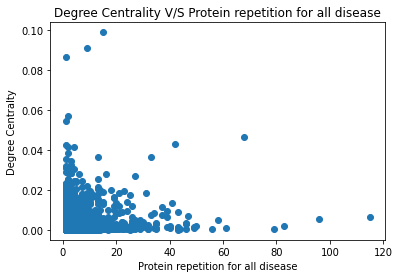

In [ ]:
plt.scatter(X_array, degree_count_of_associated_gene_unique)
plt.xlabel('Protein repetition for all disease')
plt.ylabel('Degree Centralty')
plt.title('Degree Centrality V/S Protein repetition for all disease')
plt.show()